### ASSIGNMENT - 13
### Topic - KNN_glass_problem
### By Tushar N. Mondkar (Batch of 27 March,Andheri)
### Mentor - Jayantilal Sir

__Q Prepare a model for glass classification using KNN__

In [73]:
#Importing necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [74]:
#Loading of data
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [75]:
#Checking of null values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [76]:
# replacing the glass_types from numbers to it's respective classes
df['Type'] = df['Type'].replace({1:'building_windows_float_processed',2:'building_windows_non_float_processed',3:'vehicle_windows_float_processed',5:'containers',6:'tableware',7:'headlamps'})
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [77]:
#Scaling of data(Standardization)

scaler = StandardScaler()
sc_df = pd.DataFrame(scaler.fit_transform(df.drop('Type', axis=1)))
sc_df.head()


,0,1,2,3,4,5,6,7,8
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [78]:
#Splitting of data

X = sc_df
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


Text(0, 0.5, 'Error Rate')

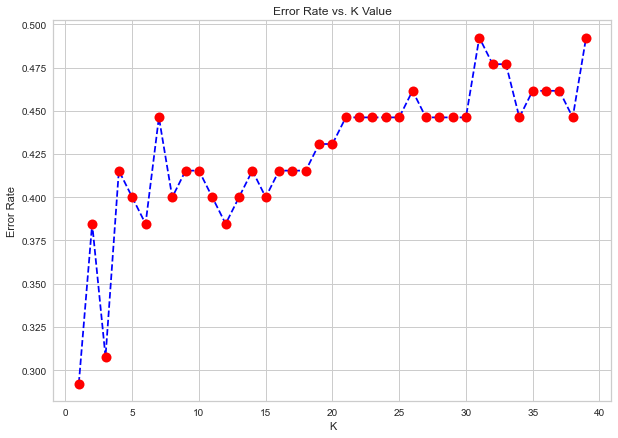

In [79]:
#Error Rates

error_rates = []

for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test != preds))

plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [86]:
# From graph it can be seen that k = 1 gives optimum error,hence taking k as 1

k = 1
knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
knn.fit(X_train, y_train)
preds = knn.predict(X_test)


In [87]:
# Evaluation of model

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))


[[19  2  0  0  0  0]
 [ 6 12  0  0  1  1]
 [ 1  1  4  0  0  0]
 [ 0  3  0  7  0  0]
 [ 0  0  0  0  2  0]
 [ 4  0  0  0  0  2]]
                                      precision    recall  f1-score   support

    building_windows_float_processed       0.63      0.90      0.75        21
building_windows_non_float_processed       0.67      0.60      0.63        20
                          containers       1.00      0.67      0.80         6
                           headlamps       1.00      0.70      0.82        10
                           tableware       0.67      1.00      0.80         2
     vehicle_windows_float_processed       0.67      0.33      0.44         6

                            accuracy                           0.71        65
                           macro avg       0.77      0.70      0.71        65
                        weighted avg       0.74      0.71      0.70        65



In [88]:
# actual vs predicted
df_test = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df_test

,Actual,Predicted
20,building_windows_float_processed,building_windows_non_float_processed
120,building_windows_non_float_processed,building_windows_non_float_processed
170,containers,containers
153,vehicle_windows_float_processed,building_windows_float_processed
212,headlamps,headlamps
...,...,...
134,building_windows_non_float_processed,building_windows_float_processed
185,headlamps,building_windows_non_float_processed
202,headlamps,headlamps
114,building_windows_non_float_processed,building_windows_non_float_processed
